In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np 

convergence
109.6875 109.68591523071684


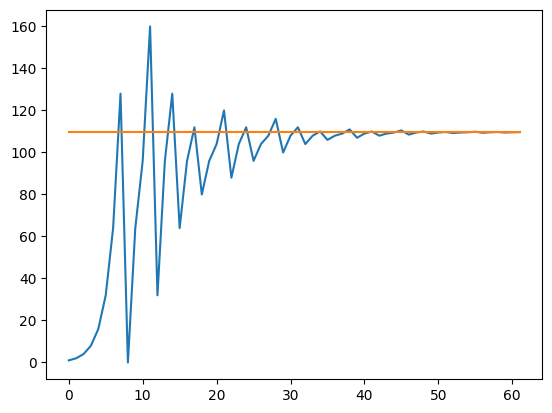

In [13]:
def iterative_square_root(target, guess = 1):
  guess_list = []
  if target < 0: 
    return None
  if target == 1:
    return 1

  sqrt = math.sqrt(target)
  step  = 1
  last = 0
  min_error = 0.1
  
 

  #upper_guess:
 
  print("convergence")
  for i in range(100):
    guess_list.append(guess)
    #print(target,guess*guess)
    guess = max(guess, 0)

    if abs((guess*guess - target)/target) < min_error/100:
      print(guess, sqrt)
      break
    
    if guess*guess > target:
      guess -= step
      if last == -1:
        step/=2
      else: step *=2
    
      last = 1

    else:
      guess += step

      if last == 1:
        step/=2
      else: step *=2
      last = -1
    
  return guess,guess_list
test = 12031
root , guess_list = iterative_square_root(test)
target_list = np.ones_like(guess_list)*math.sqrt(test)

sns.lineplot(guess_list)
sns.lineplot(target_list)
plt.show()


simulation
34.648082631570375 34.64101615137755


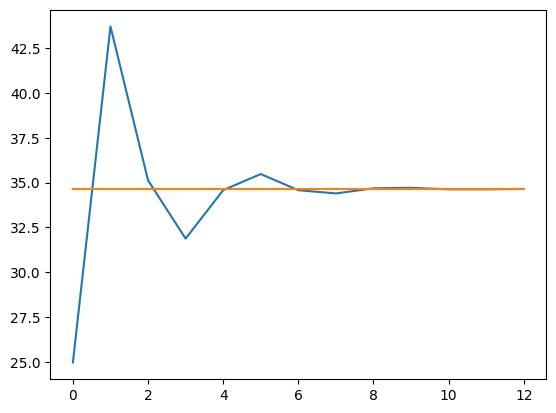

In [18]:




def hook_square_root(target, guess = 1):
    guess_list = []
    if target < 0: 
        return None
    if target == 1:
        return 1

    last_guess = guess
    current_guess = guess
    u = 7
    k = 0.2
    dt = 0.1
    min_error = 0.1

    print("simulation")
    for i in range(100):

        # guess'' = -k*(guess^2 - target) - u*guess'
        # (next - 2*current + last)/dt^2  =  -k*(current^2 - target)/dt - u*(current-last)/dt
        # next/dt^2  = ( 2*current - last)/dt^2  -k*(current^2 - target)/dt - u*(current-last)/dt
        # next  = ( 2*current - last)  -k*(current^2 - target)*dt - u*(current-last)*dt


        next_guess = ( 
            2*current_guess - last_guess - k*(current_guess**2 - target)*dt - u*(current_guess-last_guess)*dt
        ) 
        next_guess = max(next_guess,0)
        last_guess = current_guess
        current_guess = next_guess
        guess_list.append(current_guess)
        if abs(( current_guess*current_guess - target )/target) < min_error/100:
            print(current_guess, math.sqrt(target))
            return current_guess, guess_list
        
    print(current_guess, math.sqrt(target))
    return current_guess, guess_list

test = 1200
root , guess_list = hook_square_root(test)
target_list = np.ones_like(guess_list)*math.sqrt(test)

sns.lineplot(guess_list)
sns.lineplot(target_list)
plt.show()



simulation
10.485239696828508 10.488088481701515
convergence
10.484375 10.488088481701515


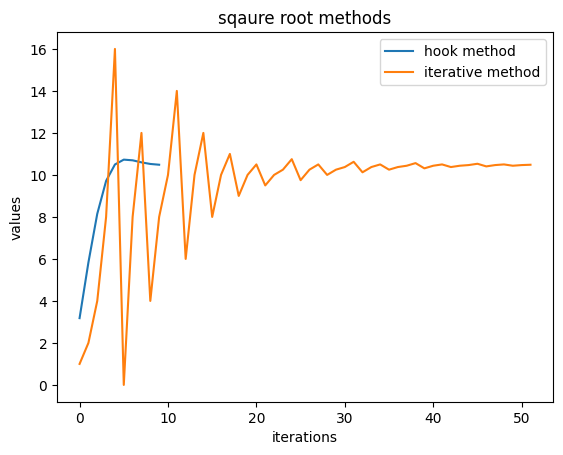

In [95]:
guess, hook = hook_square_root(110)
guess, itter = iterative_square_root(110)

plt.plot(hook, label = "hook method")
plt.plot(itter, label = "iterative method")
plt.xlabel("iterations")
plt.ylabel("values")
plt.legend()
plt.title("sqaure root methods")
plt.show()
